In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [2]:
file_list = glob.glob('/mnt/Data/Data/IMERG/raw_1dy/3IMERG*.nc')
file_list = sorted(file_list)
len_list = len(file_list)
print(f'# files: {len_list}')

# files: 7395


In [3]:
file_list[0],file_list[1],file_list[-2],file_list[-1]

('/mnt/Data/Data/IMERG/raw_1dy/3IMERG_20001201-S000000-E235959_V06.nc',
 '/mnt/Data/Data/IMERG/raw_1dy/3IMERG_20001202-S000000-E235959_V06.nc',
 '/mnt/Data/Data/IMERG/raw_1dy/3IMERG_20210227-S000000-E235959_V06.nc',
 '/mnt/Data/Data/IMERG/raw_1dy/3IMERG_20210228-S000000-E235959_V06.nc')

In [4]:
salida = None
for t in range(len_list):

    data = ca.read_netcdf(file_list[t],0)

    if salida is None:
        lat = data['lat'].data
        lon = data['lon'].data

        nlat = len(lat)
        nlon = len(lon)

        salida = np.zeros([len_list,nlat,nlon])

        lon2d, lat2d = np.meshgrid(lon, lat)

    salida[t,:,:] = data['precipitationCal'][0,:,:].data.T

pre_mean = np.mean(salida,axis=0)
pre_sum = np.sum(salida,axis=0)

In [16]:
pre_sum = ca.remove_continent_ocean(pre_sum,lat,lon,'ocean')

In [13]:
# pre_sum = np.sum(salida,axis=0)

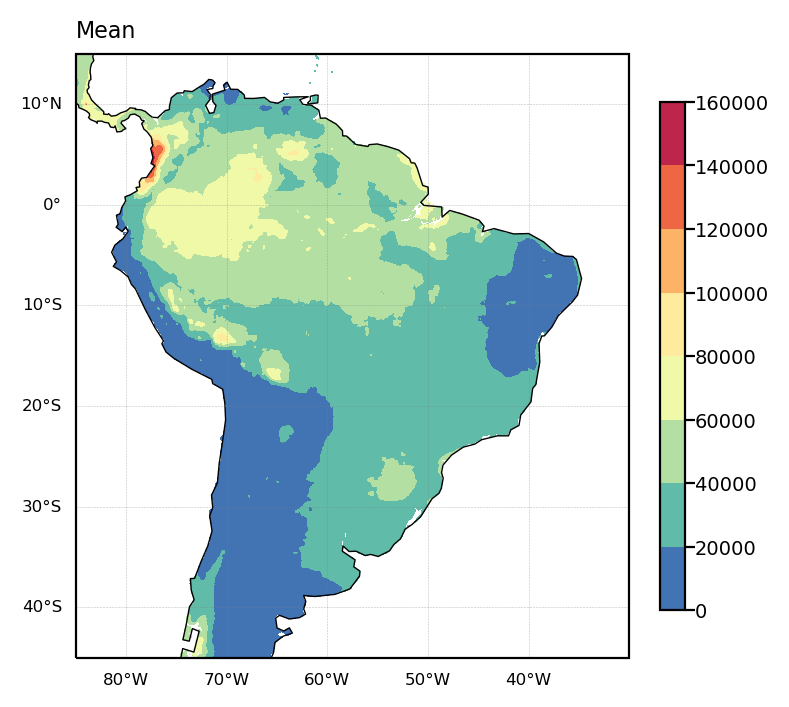

In [20]:
proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
levels = None

fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,pre_sum,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

In [11]:
file_name_out = "/mnt/Data/Data/IMERG/IMERG_2000_12_2021_02_24h_01x01.nc"

info = {'file': file_name_out,
        'title': 'IMERG precipitation data IR + microwave + gauge 0.1x0.1', 
        'year_start':2000,'month_start':12,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':2021,'month_end':2,'day_end':28,'hour_end':23,'minute_end':55,
        'time_frequency': 'daily', 
        'time_interval': 1,
        'var_name': 'pre', 
        'var_units': 'mm/day'}

print()
# ca.create_netcdf(info,salida,lat,lon)


Time Start: 2000-12-01 00:00:00
Time End: 2021-02-28 00:00:00
Time Frequency: daily
Time Lenght: 7395

File created in:  /mnt/Data/Data/IMERG/IMERG_2000_12_2021_02_24h_01x01.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  pre
var units:  mm/day
